<hr style="border:1px solid #FEC60D"> </hr>
<center><h1 style="color:#173F8A;"> FUNDAMENTOS MATEMATICOS PARA INTELIGENCIA ARTIFICIAL</h1></center> 
<center><h1 style="color:#173F8A;"> IMT 3850, 2022 </h1></center>
<hr style="border:1px solid #FEC60D"> </hr>
<center><h3 style="color:#0176DE;text-align:right;"> Profesor. Manuel A. Sanchez<br></h3></center>
<h3 style="color:#03122E;text-align:right;"> Magister en Inteligencia Artificial - MIA <br> Instituto de Ingenieria Matematica y Computacional - IMC<br>  Pontificia Universidad Catolica de Chile<br>   </h3>




<!-- Palette colors UC:
Primaria: 
celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 
Secundaria
gris oscuro: #707070
-->

<hr style="border:2px solid #03122E"> </hr>
<center><h1 style="color:#173F8A;"> Optimizacion - clase 8</h1></center> 
<hr style="border:2px solid #03122E"> </hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Funciones logistica

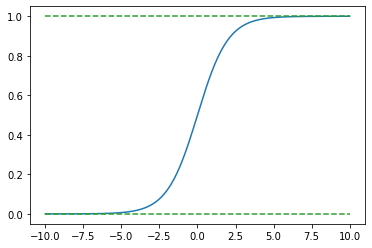

In [8]:
x = np.linspace(-10,10,200)
f = lambda x: np.exp(x)/(1+np.exp(x))
plt.plot(x,f(x))
plt.plot([-10,10],[1,1],'C02',linestyle='--')
plt.plot([-10,10],[0,0],'C02',linestyle='--')
plt.show()

## Regresion logistica

In [20]:
#parameters: u_i \in\mathbb R
u = np.random.rand(100)


In [26]:
lost = lambda a, b:  sum([a*ui+b for ui in u[0:80]] ) - sum([np.log(1+np.exp(a*ui+b)) for ui in u])
lost(1,1)

-49.19772070942918

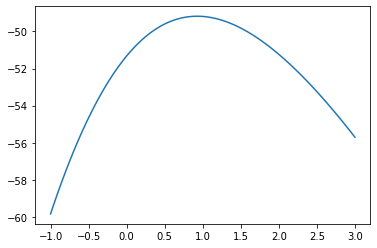

In [29]:
a = np.linspace(-1,3,100)
b = 1.0
plt.plot(a,lost(a,b))

In [2]:
fun = lambda x: 0.5*(x[0]**2+10*x[1]**2)
gradfun = lambda x: np.array([x[0], 10*x[1]])

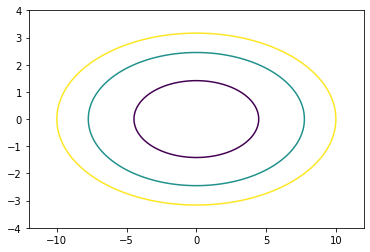

In [3]:
x = np.linspace(-12, 12,100)
y = np.linspace(-4, 4,100)
y = y.reshape(-1, 1)
X, Y = np.meshgrid(x, y)
z = fun([x,y])
plt.contour(X,Y, z, levels=[10, 30, 50])

In [4]:
def graddescent_backtracking(f, gradf, x0, MAXITER = 1000, TOL = 1e-6):
    iter = 0
    xi = x0.copy()
    gamma_i = 1
    error = 1.
    
    while error>TOL and iter<MAXITER:
        xnew = xi- gamma_i*gradf(xi)
        alpha = 0
        beta = 0.5
        gamma_i = 1.0
        while f(xnew)>f(xi)-alpha*gamma_i*np.linalg.norm(gradf(xi))**2:
            # decrease step size
            gamma_i = beta*gamma_i
            print("gamma: ", gamma_i)
            xnew = xi- gamma_i*gradf(xi)
        
        error = np.linalg.norm(xnew-xi)
        xi = xnew
        print("x: ", xi, "f(x): ", f(xi))
        iter += 1
        
    return xi, iter

In [5]:

graddescent_backtracking(fun, gradfun, x0= np.array([10,1]), MAXITER = 1000, TOL = 1e-6)

gamma:  0.5
gamma:  0.25
x:  [ 7.5 -1.5] f(x):  39.375
gamma:  0.5
gamma:  0.25
gamma:  0.125
x:  [6.5625 0.375 ] f(x):  22.236328125
x:  [ 5.7421875 -0.09375  ] f(x):  16.530303955078125
x:  [0.      0.84375] f(x):  3.5595703125
gamma:  0.5
gamma:  0.25
gamma:  0.125
x:  [ 0.        -0.2109375] f(x):  0.22247314453125
x:  [0.         0.05273438] f(x):  0.013904571533203125
gamma:  0.5
gamma:  0.25
gamma:  0.125
x:  [ 0.         -0.01318359] f(x):  0.0008690357208251953
x:  [0.        0.0032959] f(x):  5.431473255157471e-05
gamma:  0.5
gamma:  0.25
gamma:  0.125
x:  [ 0.         -0.00082397] f(x):  3.394670784473419e-06
x:  [0.         0.00020599] f(x):  2.121669240295887e-07
gamma:  0.5
gamma:  0.25
gamma:  0.125
x:  [ 0.00000000e+00 -5.14984131e-05] f(x):  1.3260432751849294e-08
x:  [0.00000000e+00 1.28746033e-05] f(x):  8.287770469905809e-10
gamma:  0.5
gamma:  0.25
gamma:  0.125
x:  [ 0.00000000e+00 -3.21865082e-06] f(x):  5.1798565436911304e-11
x:  [0.00000000e+00 8.04662704e-07] 

(array([0.0000000e+00, 5.0291419e-08]), 16)

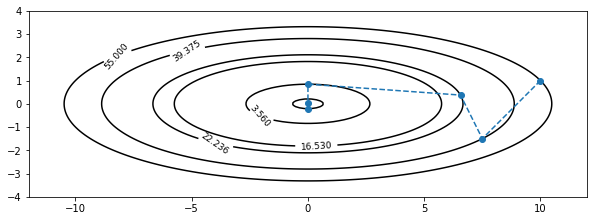

In [8]:
x = np.linspace(-12, 12,100)
y = np.linspace(-4, 4,100)
y = y.reshape(-1, 1)
X, Y = np.meshgrid(x, y)
z = fun([x,y])

fig, ax = plt.subplots(figsize=(10,10))
#ax.plot(10,1,'C00',marker='o')
#ax.plot( 7.5, -1.5,'C01',marker='o')
#ax.plot(6.5625, 0.375,'C02',marker='o')
#ax.plot(0.   ,   0.84375,'C03',marker='o')
#ax.plot( 0. ,       -0.2109375,'C04',marker='o')
#ax.plot(0.   ,      0.05273438,'C05',marker='o')
ax.plot([10,7.5,6.5625,0. ,0.,0. ]  , [ 1,-1.5,0.375,0.84375,-0.2109375,0.05273438],'C00',linestyle='--', marker='o')
CS = ax.contour(X,Y, z, levels=[0.013904571533203125, 0.22247314453125, 3.5595703125,16.530303955078125, 22.236328125, 39.375, 55],
               colors='k')#,colors=['C05', 'C04', 'C03','C02', 'C01', 'C00'])
ax.clabel(CS, fontsize=9, inline=True)
ax.set_aspect('equal')

